In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import statsmodels.stats.proportion as sp

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# Exploratory Data Analysis

### Descriptive Statistics

DF.head is used to check first 5 rows in the Dataframe

In [6]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [7]:
# to check the shape of the DF
df.shape

(4888, 20)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [9]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [11]:
df.replace('Fe Male','Female', inplace = True)

In [12]:
df.isnull().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

In [13]:
#missing value percentage in the columns
round(100*(df.isnull().sum()/len(df.index)), 2)

CustomerID                  0.00
ProdTaken                   0.00
Age                         4.62
TypeofContact               0.51
CityTier                    0.00
DurationOfPitch             5.14
Occupation                  0.00
Gender                      0.00
NumberOfPersonVisiting      0.00
NumberOfFollowups           0.92
ProductPitched              0.00
PreferredPropertyStar       0.53
MaritalStatus               0.00
NumberOfTrips               2.86
Passport                    0.00
PitchSatisfactionScore      0.00
OwnCar                      0.00
NumberOfChildrenVisiting    1.35
Designation                 0.00
MonthlyIncome               4.77
dtype: float64

inplace=True in pandas DataFrame operations modifies the DataFrame directly without the need to create a new copy, saving memory and potentially improving performance.

In [15]:
# here above we can absorve null values in dataset. so we use axis=0 to drop null values in rows.
df.dropna(axis=0, inplace=True)

In [16]:
#missing value percentage in the columns
round(100*(df.isnull().sum()/len(df.index)), 2)

CustomerID                  0.0
ProdTaken                   0.0
Age                         0.0
TypeofContact               0.0
CityTier                    0.0
DurationOfPitch             0.0
Occupation                  0.0
Gender                      0.0
NumberOfPersonVisiting      0.0
NumberOfFollowups           0.0
ProductPitched              0.0
PreferredPropertyStar       0.0
MaritalStatus               0.0
NumberOfTrips               0.0
Passport                    0.0
PitchSatisfactionScore      0.0
OwnCar                      0.0
NumberOfChildrenVisiting    0.0
Designation                 0.0
MonthlyIncome               0.0
dtype: float64

In [17]:
df.shape

(4128, 20)

We are saving categorical and numerical colums in new DF

In [19]:
cats = ['ProdTaken', 'CityTier', 'PreferredPropertyStar', 'Passport',
        'OwnCar', 'PitchSatisfactionScore', 'TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
        'MaritalStatus', 'Designation']
nums = ['CustomerID', 'Age', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups',
       'NumberOfTrips',
       'NumberOfChildrenVisiting', 'MonthlyIncome']

# Univariate Analysis

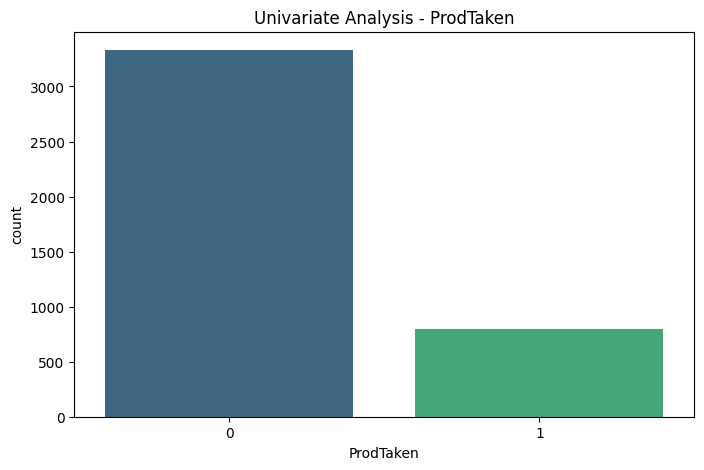

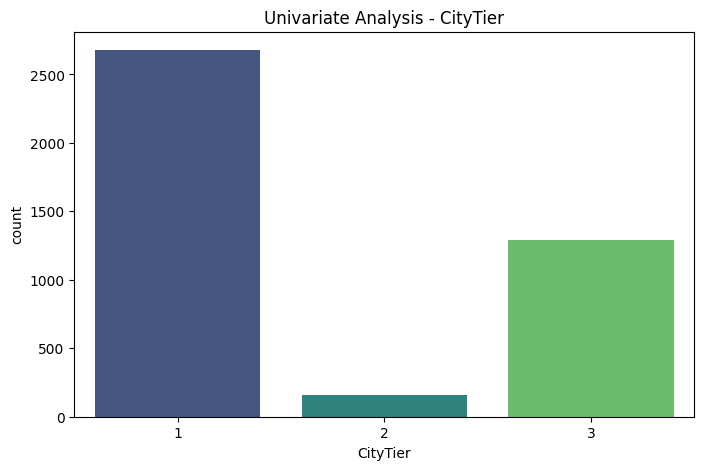

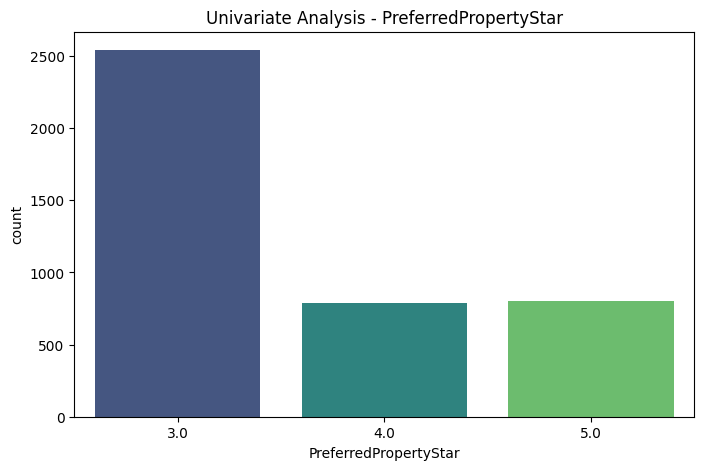

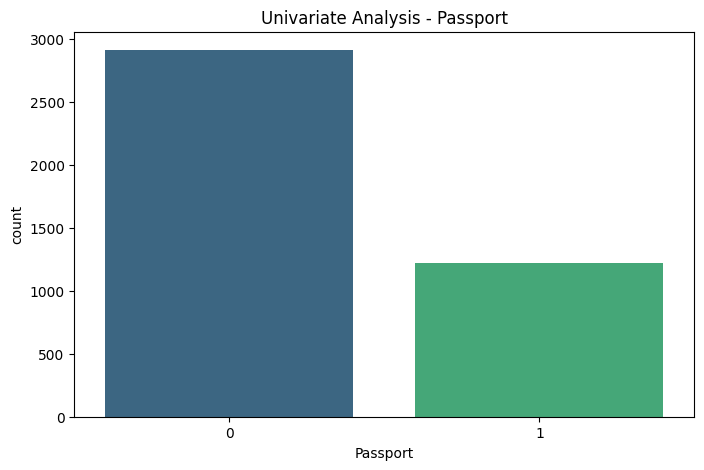

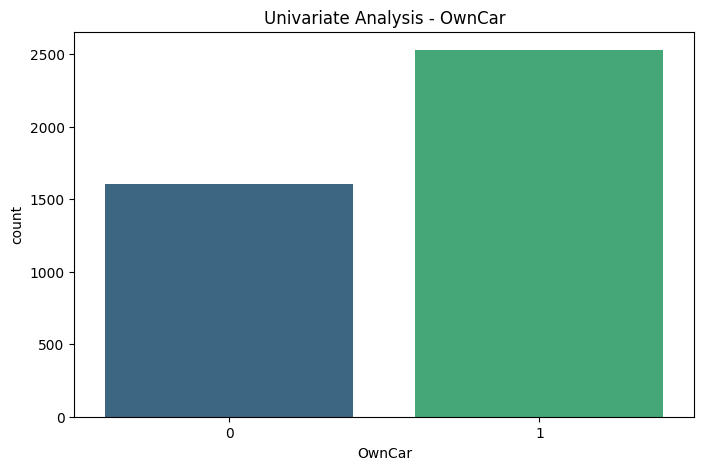

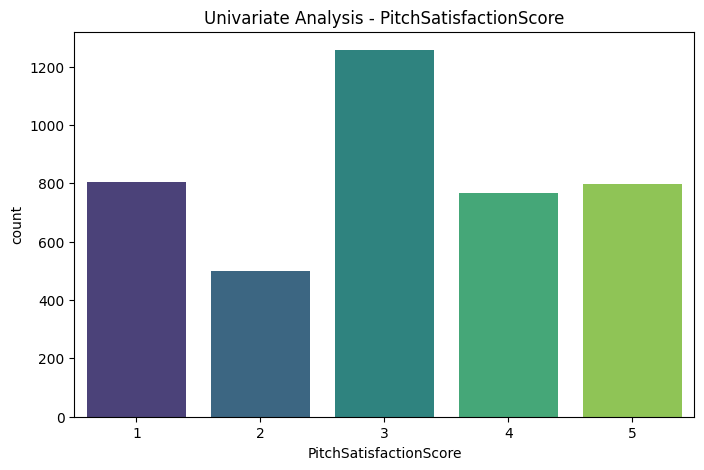

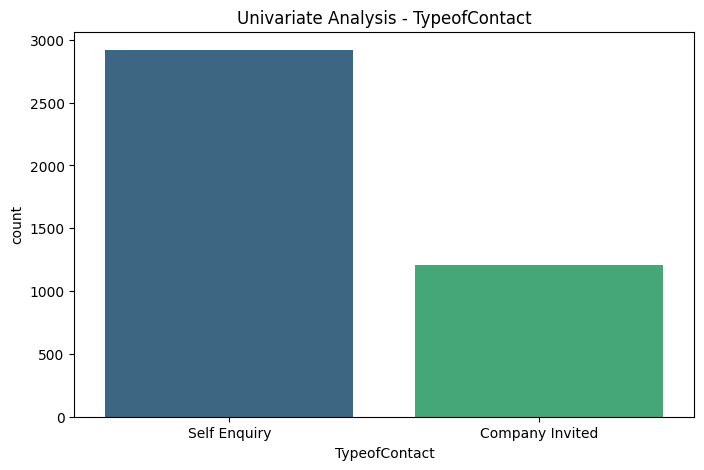

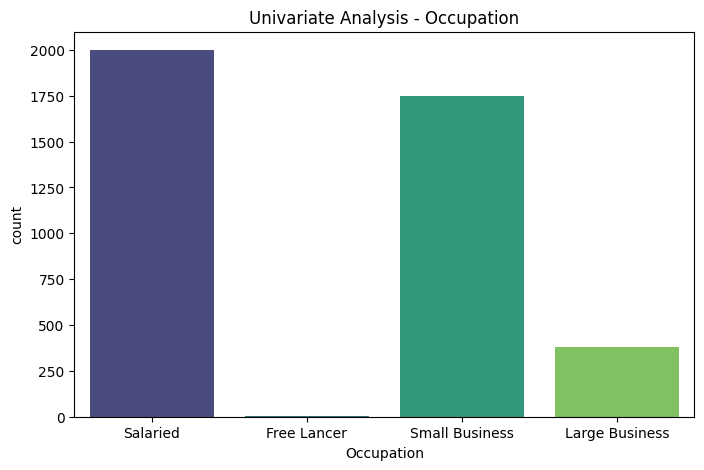

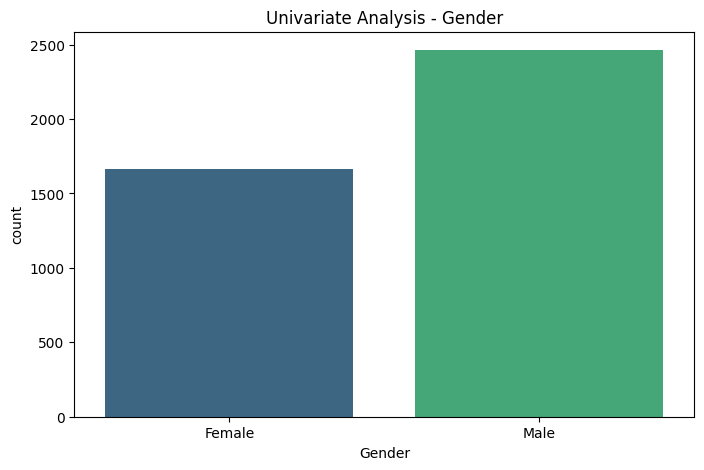

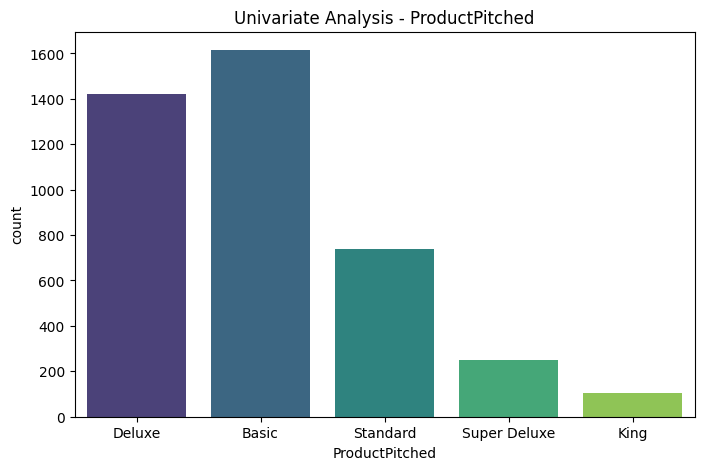

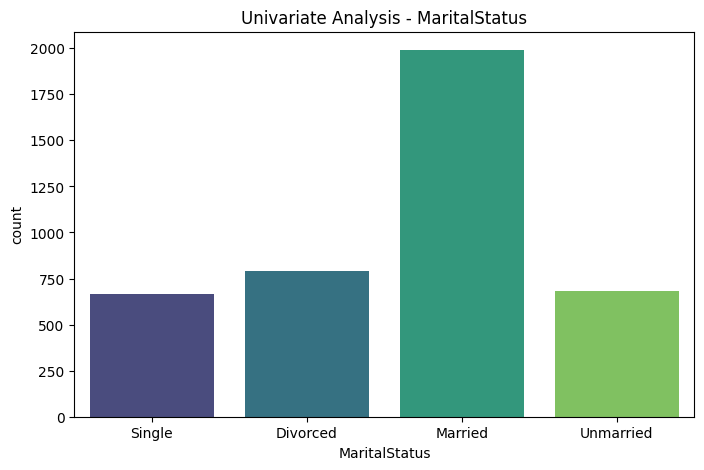

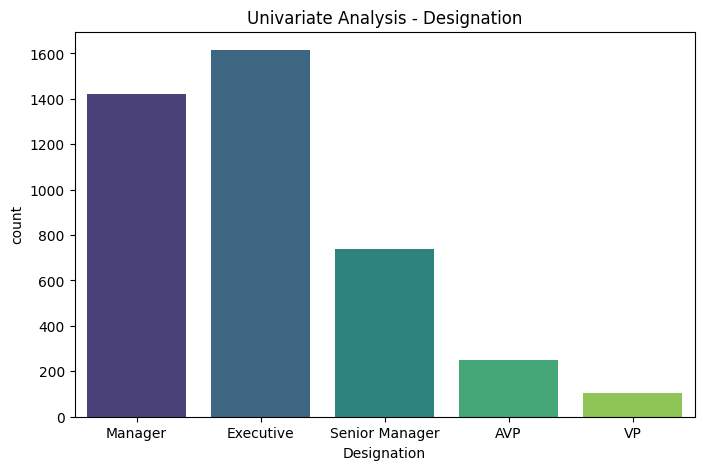

In [21]:
# Univariate Analysis for Categorical Columns
for cat_column in cats:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=cat_column, data=df, palette='viridis')
    plt.title(f'Univariate Analysis - {cat_column}')
    plt.show()


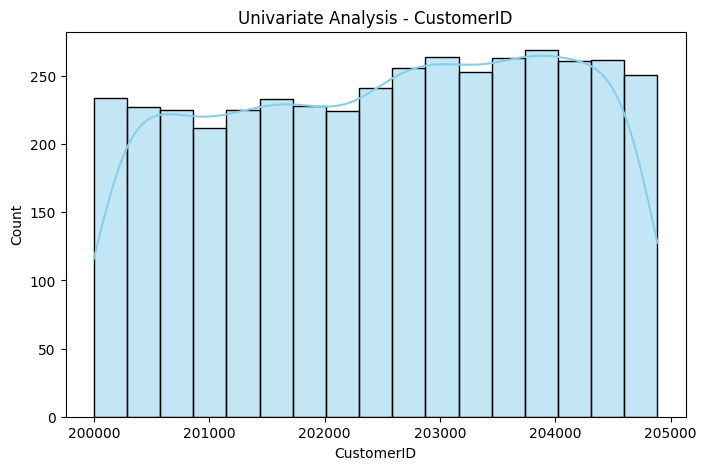

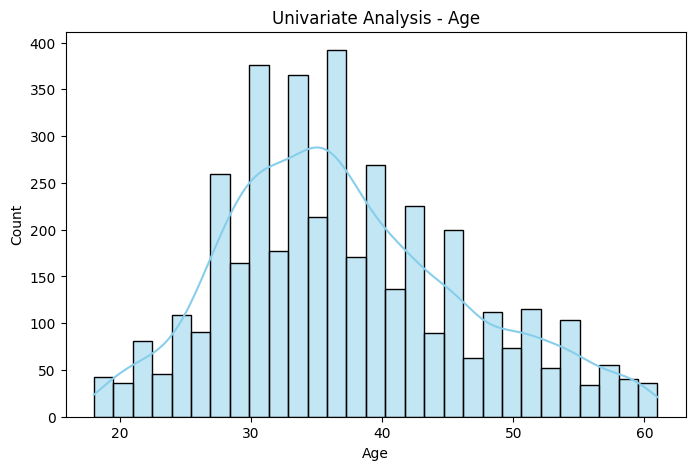

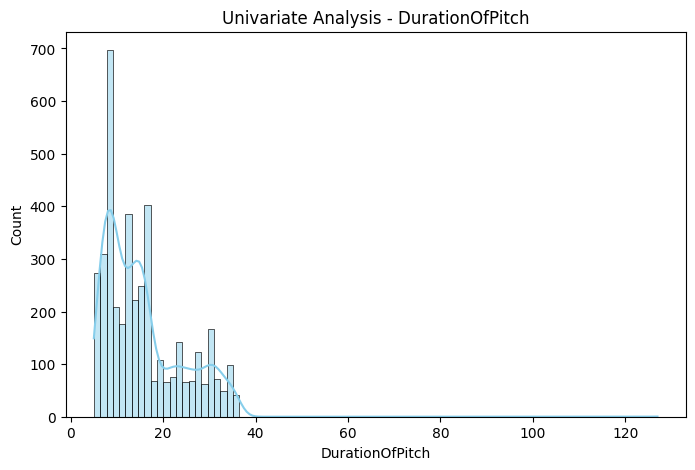

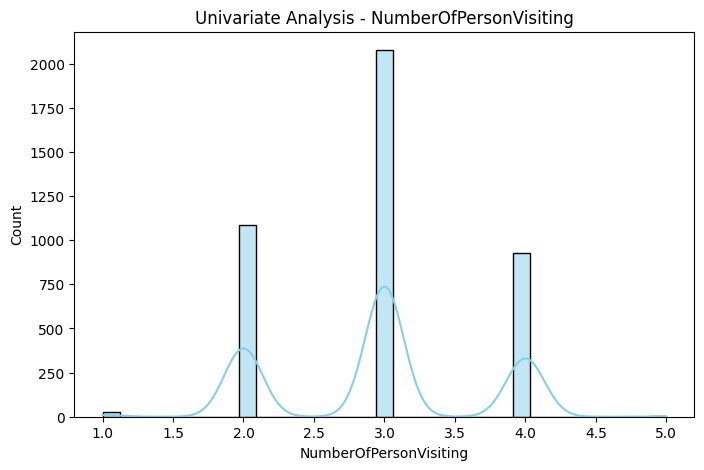

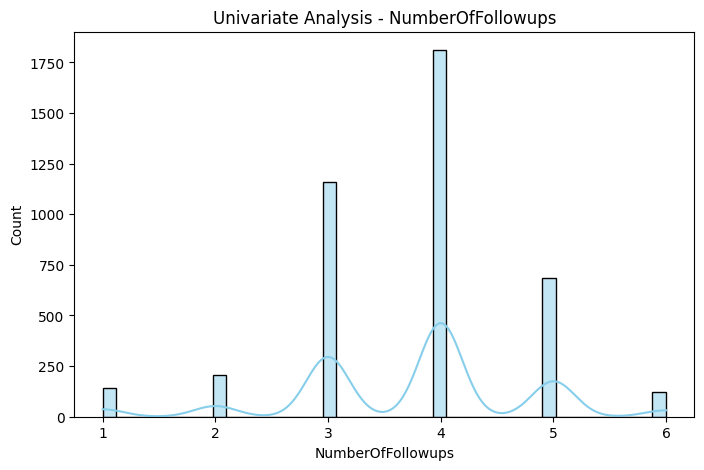

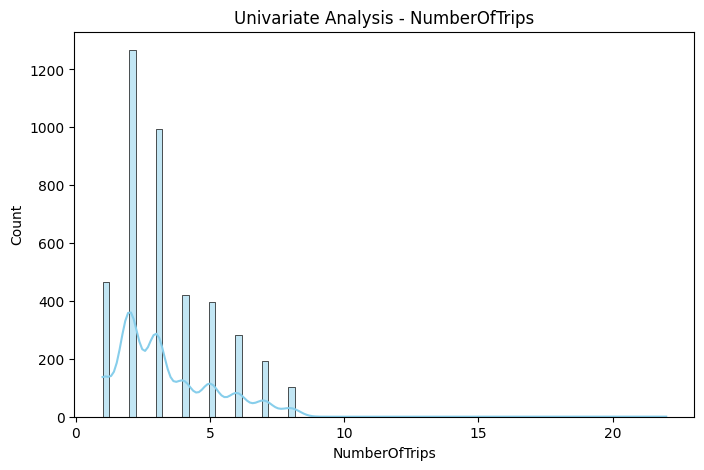

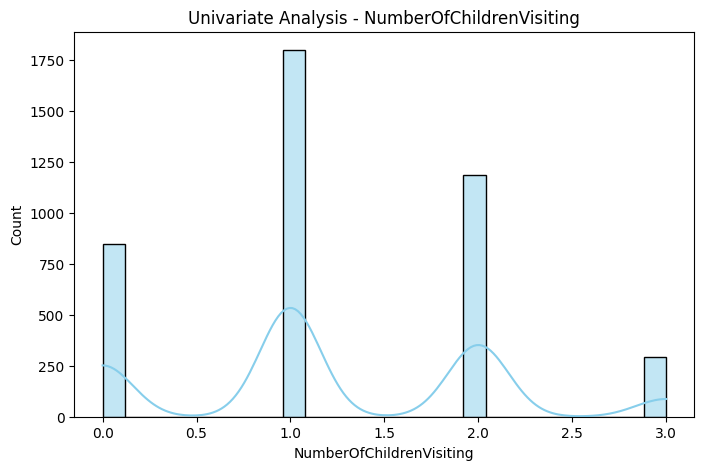

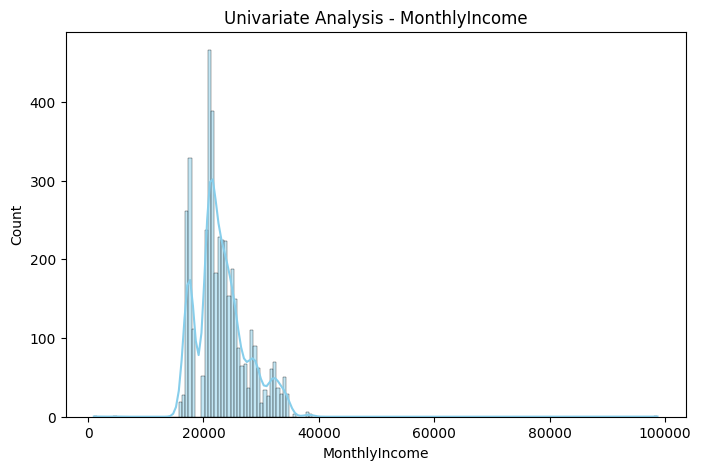

In [22]:
# Univariate Analysis for Numerical Columns
for num_column in nums:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[num_column], kde=True, color='skyblue')
    plt.title(f'Univariate Analysis - {num_column}')
    plt.show()

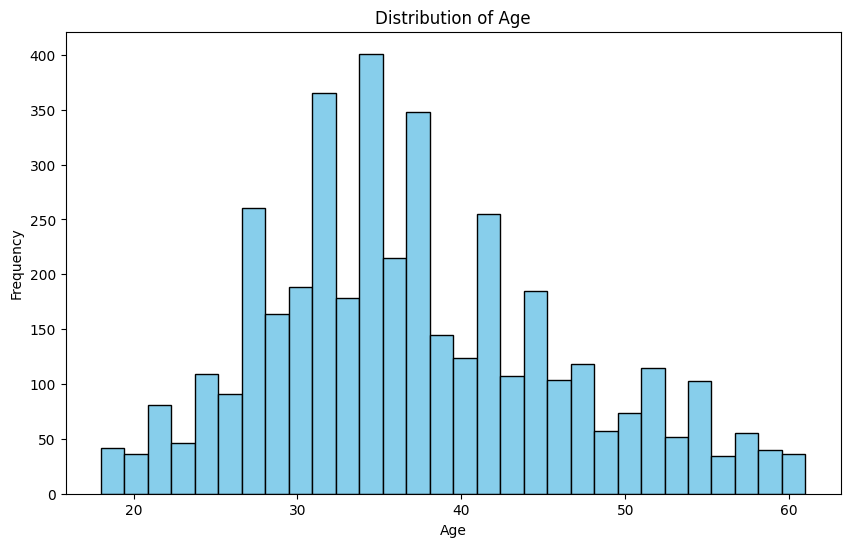

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


**Question: Which Age group people are travelling more ?**

Answer: if you look at the graph. we can say that agr group between 30 to 40 are travelling more compare to other age groups.

**Question: Which age group people specificly travelling 2nd most. compare to other groups?**

Answer: people belong to age group 32 to 35 are travelling second most.

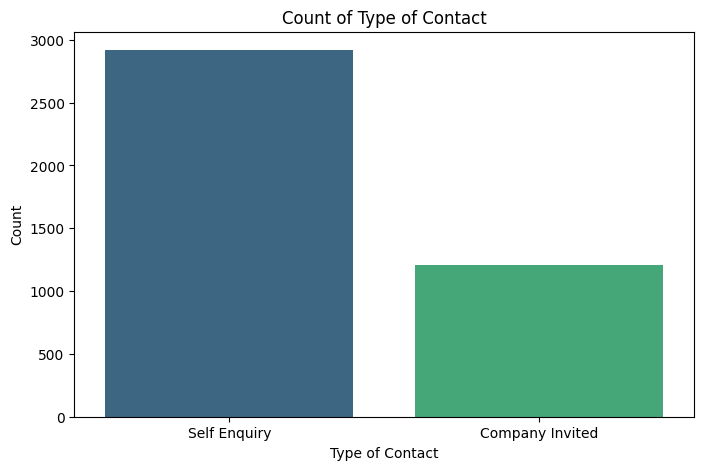

In [25]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='TypeofContact', data=df, palette='viridis')
plt.title('Count of Type of Contact')
plt.xlabel('Type of Contact')
plt.ylabel('Count')
plt.show()


 ### Question: Why do we use .T after df[nums].describe()?
 Using .T transposes the DataFrame, swapping rows and columns. It presents the summary statistics for numerical data in a more readable format, with variables as rows and statistics as columns.

In [27]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4128.0,202527.763808,1409.439133,200000.0,201320.75,202603.5,203748.25,204887.0
Age,4128.0,37.231831,9.174521,18.0,31.00,36.0,43.00,61.0
DurationOfPitch,4128.0,15.584787,8.398142,5.0,9.00,14.0,20.00,127.0
NumberOfPersonVisiting,4128.0,2.949370,0.718818,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4128.0,3.741521,1.006786,1.0,3.00,4.0,4.00,6.0
NumberOfTrips,4128.0,3.295300,1.856300,1.0,2.00,3.0,4.00,22.0
NumberOfChildrenVisiting,4128.0,1.223595,0.852685,0.0,1.00,1.0,2.00,3.0
MonthlyIncome,4128.0,23178.464147,4506.614622,1000.0,20751.00,22418.0,25301.00,98678.0


In [28]:
df[cats].describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4128.0,0.193072,0.394757,0.0,0.0,0.0,0.0,1.0
CityTier,4128.0,1.663275,0.920640,1.0,1.0,1.0,3.0,3.0
PreferredPropertyStar,4128.0,3.578488,0.795031,3.0,3.0,3.0,4.0,5.0
Passport,4128.0,0.295300,0.456233,0.0,0.0,0.0,1.0,1.0
OwnCar,4128.0,0.612161,0.487317,0.0,0.0,1.0,1.0,1.0
PitchSatisfactionScore,4128.0,3.060804,1.363064,1.0,2.0,3.0,4.0,5.0


In [29]:
#To make sure categorical column is treated as categorical,
#converted to object as we had made bifurcation of cat num columns manually
df[cats] = df[cats].astype('object')

In [30]:
df[cats].describe().T

,count,unique,top,freq
ProdTaken,4128,2,0,3331
CityTier,4128,3,1,2678
PreferredPropertyStar,4128.0,3.0,3.0,2541.0
Passport,4128,2,0,2909
OwnCar,4128,2,1,2527
PitchSatisfactionScore,4128,5,3,1257
TypeofContact,4128,2,Self Enquiry,2918
Occupation,4128,4,Salaried,1999
Gender,4128,2,Male,2463
ProductPitched,4128,5,Basic,1615


In [31]:
# To check unique features in columns
for i in df[cats].columns:
    x = df[i].unique()
    print(f'{i}: {x}')
    print()

ProdTaken: [1 0]

CityTier: [3 1 2]

PreferredPropertyStar: [3.0 4.0 5.0]

Passport: [1 0]

OwnCar: [1 0]

PitchSatisfactionScore: [2 3 5 4 1]

TypeofContact: ['Self Enquiry' 'Company Invited']

Occupation: ['Salaried' 'Free Lancer' 'Small Business' 'Large Business']

Gender: ['Female' 'Male']

ProductPitched: ['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']

MaritalStatus: ['Single' 'Divorced' 'Married' 'Unmarried']

Designation: ['Manager' 'Executive' 'Senior Manager' 'AVP' 'VP']



In [32]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

# Bi-variate Analysis

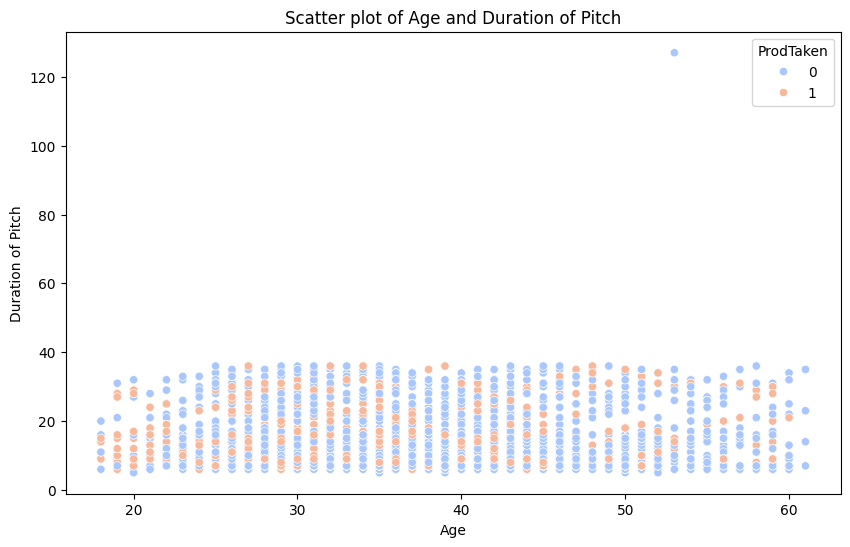

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='DurationOfPitch', data=df, hue='ProdTaken', palette='coolwarm')
plt.title('Scatter plot of Age and Duration of Pitch')
plt.xlabel('Age')
plt.ylabel('Duration of Pitch')
plt.show()


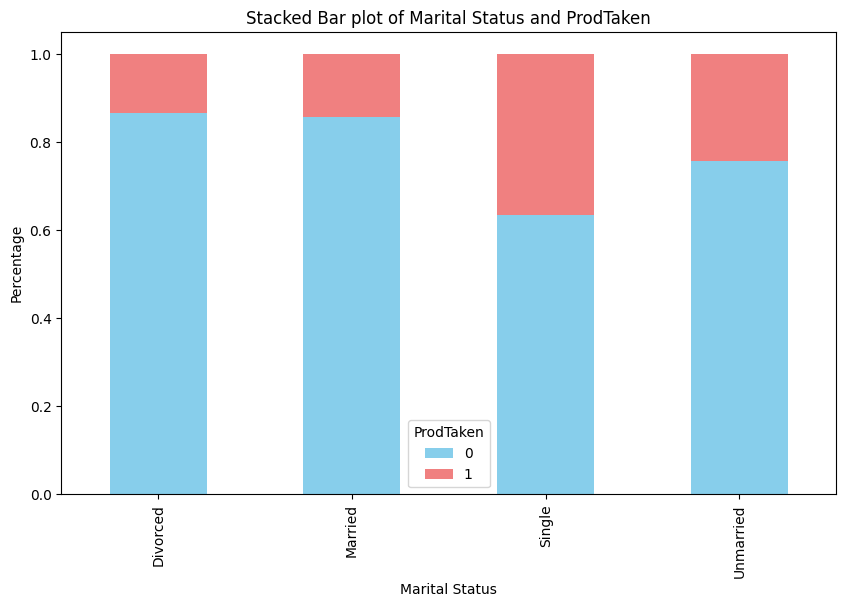

In [35]:
cross_tab = pd.crosstab(df['MaritalStatus'], df['ProdTaken'], normalize='index') #normalize gives percentage
cross_tab.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'], figsize=(10, 6))
plt.title('Stacked Bar plot of Marital Status and ProdTaken')
plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.show()


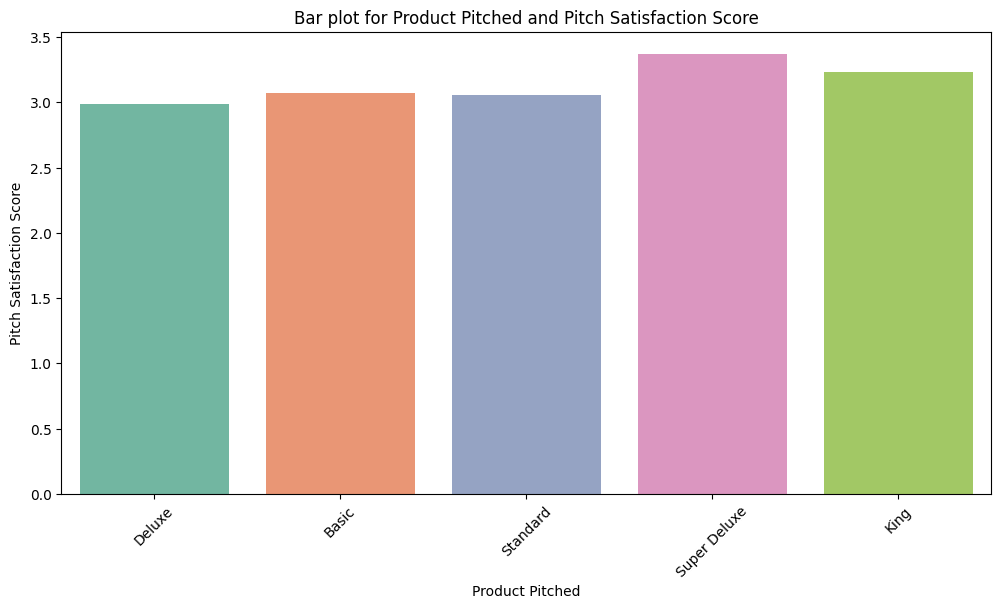

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(x='ProductPitched', y='PitchSatisfactionScore', data=df, ci=None, palette='Set2')
plt.title('Bar plot for Product Pitched and Pitch Satisfaction Score')
plt.xlabel('Product Pitched')
plt.ylabel('Pitch Satisfaction Score')
plt.xticks(rotation=45)
plt.show()


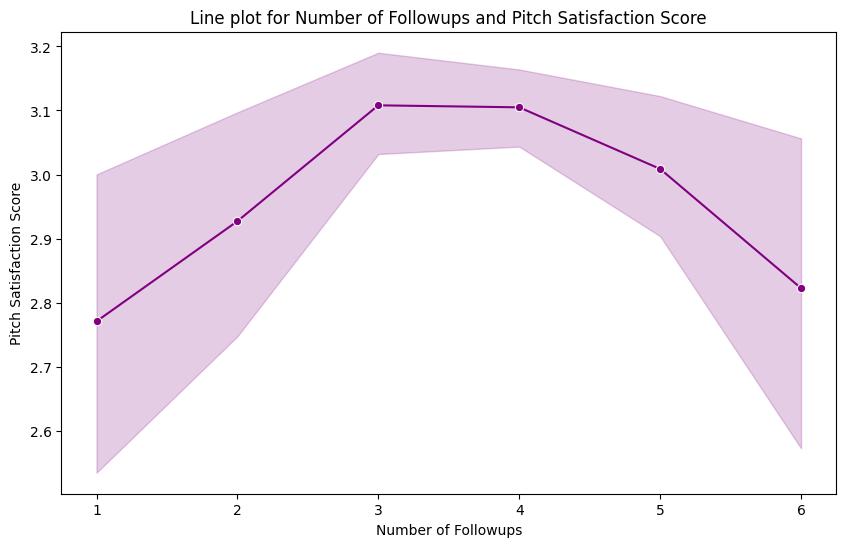

In [37]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='NumberOfFollowups', y='PitchSatisfactionScore', data=df, marker='o', color='purple')
plt.title('Line plot for Number of Followups and Pitch Satisfaction Score')
plt.xlabel('Number of Followups')
plt.ylabel('Pitch Satisfaction Score')
plt.show()


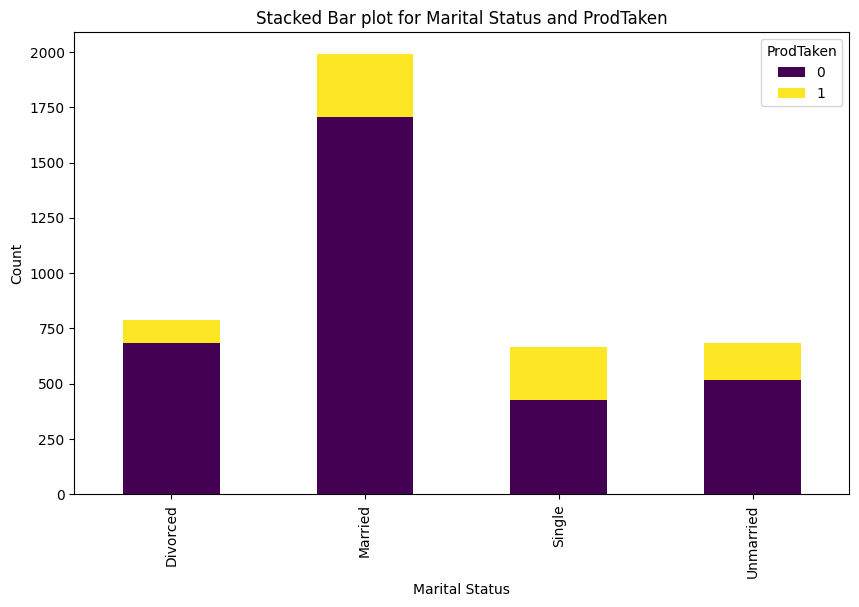

In [38]:
cross_table = pd.crosstab(df['MaritalStatus'], df['ProdTaken'])
cross_table.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title('Stacked Bar plot for Marital Status and ProdTaken')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


# Multi variate analysis

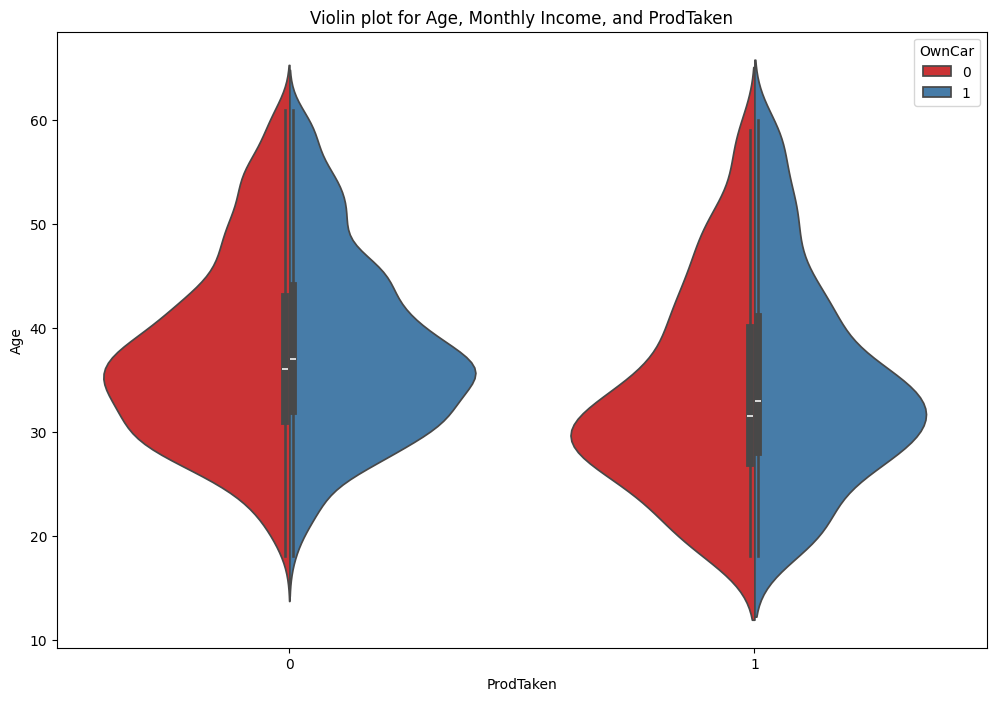

In [40]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='ProdTaken', y='Age', data=df, hue='OwnCar', split=True, palette='Set1')
plt.title('Violin plot for Age, Monthly Income, and ProdTaken')
plt.xlabel('ProdTaken')
plt.ylabel('Age')
plt.show()


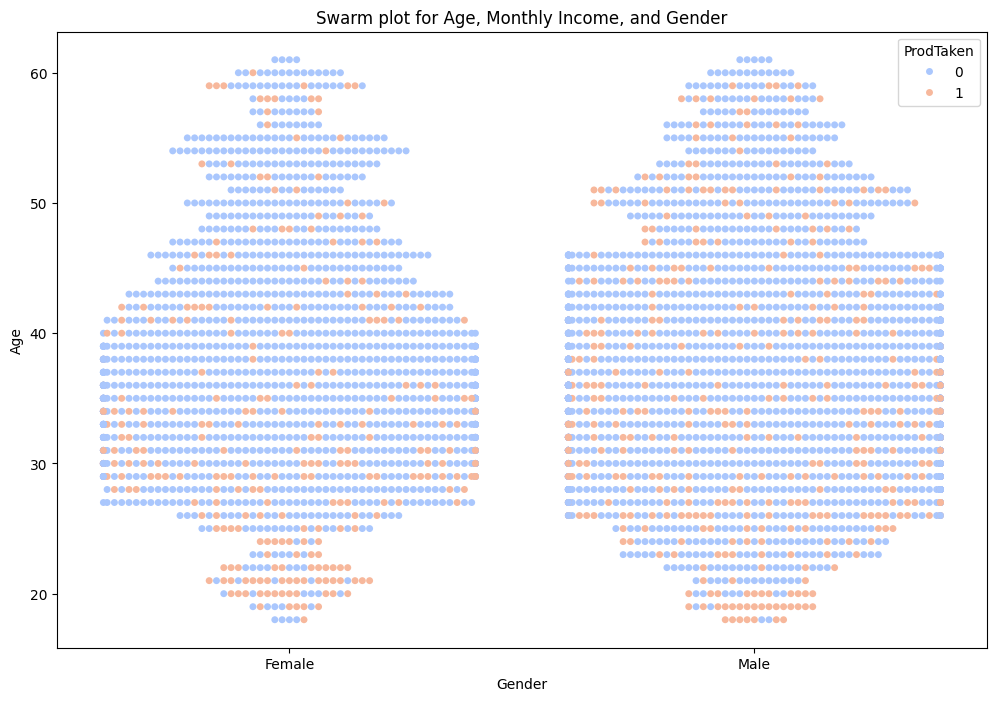

In [41]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x='Gender', y='Age', data=df, hue='ProdTaken', palette='coolwarm')
plt.title('Swarm plot for Age, Monthly Income, and Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


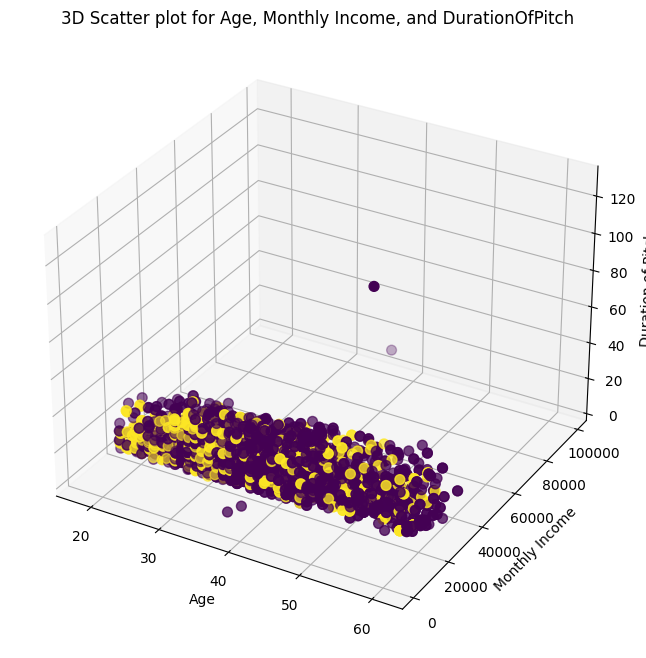

In [42]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['MonthlyIncome'], df['DurationOfPitch'], c=df['ProdTaken'], cmap='viridis', s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Monthly Income')
ax.set_zlabel('Duration of Pitch')
ax.set_title('3D Scatter plot for Age, Monthly Income, and DurationOfPitch')
plt.show()


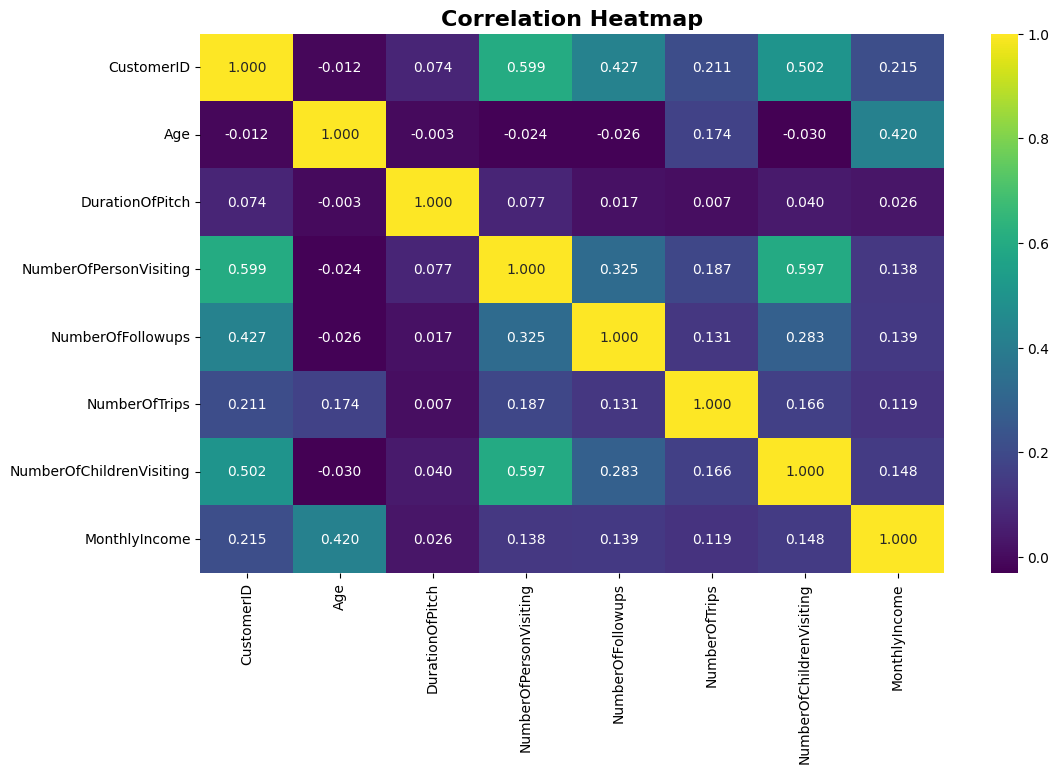

In [43]:
numeric_columns = df.select_dtypes(include='number')
plt.figure(figsize=(12,7))
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
sns.heatmap(numeric_columns.corr(), cmap='viridis', annot=True, fmt='.3f')
plt.show()

**Insights and Questions from the Correlation Heatmap:**

1. **Strong Positive Correlation:**
   - `NumberOfFollowups` and `NumberOfTrips`: This suggests that customers who receive more follow-ups are more likely to take more trips.
   - `NumberOfPersonVisiting` and `NumberOfChildrenVisiting`: This indicates that customers who travel with more people tend to have more children.
2. **Weak Positive Correlation:**
   - `Age` and `MonthlyIncome`: This suggests that older customers tend to have higher incomes.
   - `DurationOfPitch` and `PitchSatisfactionScore`: This indicates that customers who spend more time on the pitch tend to be more satisfied with it.
3. **Weak Negative Correlation:**
   - `Age` and `NumberOfTrips`: This suggests that older customers tend to take fewer trips.
   - `MonthlyIncome` and `NumberOfFollowups`: This indicates that customers with higher incomes receive fewer follow-ups.
4. **Questions:**
   - Is there a causal relationship between the number of follow-ups and the number of trips?
   - Do older customers have higher incomes because they have had more time to accumulate wealth?
   - Do customers who spend more time on the pitch have higher satisfaction scores because they are more engaged with the product?


## Feature Engineering

In [46]:
df.columns


Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [47]:
df = df.drop(columns=['CustomerID'])

In [48]:
df.columns


Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [49]:
# We will create a new column TotalVisiting that will be addition of two columns i.e. NumberOfPersonVisiting and NumberOfChildrenVisiting

df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], axis=1, inplace=True)

In [50]:
# Numerical Features

num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print("Number of Numerical Features are: ", len(num_features))

Number of Numerical Features are:  6


In [51]:
# Categorical Features

cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print("Number of Categorical Features are: ", len(cat_features))

Number of Categorical Features are:  12


In [52]:
# Discrete Features

discrete_features = [feature for feature in num_features if len(df[feature].unique()) <= 25]
print("Number of Discrete Features are: ", len(discrete_features))

Number of Discrete Features are:  3


## Train test split

In [54]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['ProdTaken'], axis=1)
y = df['ProdTaken']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [56]:
X_train.shape, X_test.shape

((3302, 17), (826, 17))

In [57]:
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns

#scaling>> numerical features
#categorical>>onehot encoding

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
# Applies transformers to columns of an array or pandas DataFrame.

# This estimator allows different columns or column subsets of the input to be transformed separately
# and the features generated by each transformer will be concatenated to form a single feature space.
# This is useful for heterogeneous or columnar data,
# to combine several feature extraction mechanisms or transformations into a single transformer.

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [58]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'CityTier', 'Occupation', 'Gender', 'ProductPitched',
       'PreferredPropertyStar', 'MaritalStatus', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'DurationOfPitch', 'NumberOfFollowups', 'NumberOfTrips',
       'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [59]:
X_train = preprocessor.fit_transform(X_train)

In [60]:
X_test = preprocessor.transform(X_test)

In [61]:
# Now we can start training with algorithms.

In [62]:
X_train

array([[ 0.        ,  1.        ,  0.        , ..., -1.24196966,
        -1.19495512, -0.85035994],
       [ 1.        ,  0.        ,  0.        , ..., -1.24196966,
        -0.45995632, -0.85035994],
       [ 0.        ,  0.        ,  0.        , ...,  0.91587502,
         1.44161239,  1.30127877],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  1.45533619,
        -0.38891307, -0.13314704],
       [ 1.        ,  0.        ,  0.        , ...,  0.37641385,
        -0.26165492,  1.30127877],
       [ 1.        ,  0.        ,  0.        , ...,  0.37641385,
        -0.50067892, -0.85035994]])

In [63]:
X_test

array([[ 1.        ,  0.        ,  0.        , ..., -0.70250849,
        -0.05782057, -0.85035994],
       [ 1.        ,  0.        ,  1.        , ..., -0.16304732,
         0.92195651,  0.58406587],
       [ 1.        ,  0.        ,  1.        , ..., -0.16304732,
         1.32586281,  1.30127877],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.70250849,
        -0.49713783,  2.01849168],
       [ 1.        ,  0.        ,  0.        , ..., -0.16304732,
        -0.47235015, -0.13314704],
       [ 1.        ,  0.        ,  1.        , ...,  0.91587502,
         0.53796888,  0.58406587]])